In [5]:
import dxchange
import matplotlib.pyplot as plt

In [3]:
image = "/HFIR/CG1D/IPTS-33767/shared/PSI_files/09_nct/09_nct_post_2/nct_post_2_actual_00001.fits"
import os
os.path.exists(image)

True

In [4]:
data = dxchange.read_fits(image)

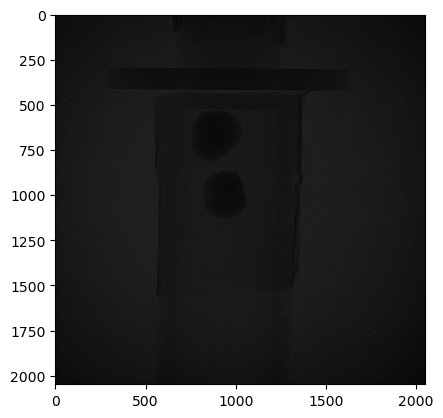

In [6]:
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')